<a href="https://colab.research.google.com/github/PavanKorukonda/Association-Rule-mining/blob/main/PavanInternal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Phase 1: Load the dataset

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
df = pd.read_csv("/content/accepted_2007_to_2018Q4.csv.gz", low_memory=False)

In [ ]:
df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260696,88985880,NaN,40000.0,40000.0,40000.0,60 months,10.49,859.56,B,B3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2260697,88224441,NaN,24000.0,24000.0,24000.0,60 months,14.49,564.56,C,C4,...,NaN,NaN,Cash,Y,Mar-2019,ACTIVE,Mar-2019,10000.0,44.82,1.0
2260698,88215728,NaN,14000.0,14000.0,14000.0,60 months,14.49,329.33,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2260699,Total amount funded in policy code 1: 1465324575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.info(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Data columns (total 151 columns):
 #    Column                                      Dtype  
---   ------                                      -----  
 0    id                                          object 
 1    member_id                                   float64
 2    loan_amnt                                   float64
 3    funded_amnt                                 float64
 4    funded_amnt_inv                             float64
 5    term                                        object 
 6    int_rate                                    float64
 7    installment                                 float64
 8    grade                                       object 
 9    sub_grade                                   object 
 10   emp_title                                   object 
 11   emp_length                                  object 
 12   home_ownership                              object 
 13   annual_inc

In [6]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


**Missing value Analysis**

In [7]:
# Calculate missing value count and percentage
missing_df = pd.DataFrame({
    'missing_count': df.isnull().sum(),
    'missing_percent': (df.isnull().mean() * 100).round(2)
})

# Sort the table by highest % missing
missing_df = missing_df.sort_values('missing_percent', ascending=False)

print("=== Missing Value Analysis (Sorted) ===")
print(missing_df)

missing_df

=== Missing Value Analysis (Sorted) ===
                                            missing_count  missing_percent
member_id                                         2260701           100.00
orig_projected_additional_accrued_interest        2252050            99.62
hardship_reason                                   2249784            99.52
hardship_payoff_balance_amount                    2249784            99.52
hardship_last_payment_amount                      2249784            99.52
...                                                   ...              ...
total_rec_int                                          33             0.00
earliest_cr_line                                       62             0.00
hardship_flag                                          33             0.00
disbursement_method                                    33             0.00
debt_settlement_flag                                   33             0.00

[151 rows x 2 columns]


,missing_count,missing_percent
member_id,2260701,100.00
orig_projected_additional_accrued_interest,2252050,99.62
hardship_reason,2249784,99.52
hardship_payoff_balance_amount,2249784,99.52
hardship_last_payment_amount,2249784,99.52
...,...,...
total_rec_int,33,0.00
earliest_cr_line,62,0.00
hardship_flag,33,0.00
disbursement_method,33,0.00


**Data Categorization**

In [8]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
obj_cols = df.select_dtypes(include=['object']).columns.tolist()
datetime_candidates = [c for c in obj_cols if 'date' in c.lower() or 'issue' in c.lower() or 'year' in c.lower()]

print("\nNumerical features (example):", num_cols[:10])
print("Object features (example):", obj_cols[:10])
print("Datetime candidates (heuristic):", datetime_candidates)

# Brief categorization dictionary (users should refine with domain knowledge)
feature_types = {}
for c in df.columns:
    if c in num_cols:
        feature_types[c] = 'Numerical'
    elif c in datetime_candidates:
        feature_types[c] = 'Datetime-like (string)'
    else:
        feature_types[c] = 'Categorical (nominal/ordinal uncertain)'

# Show small sample of categorization
ft_sample = pd.Series(feature_types).sort_values()
display(ft_sample.head(40))


Numerical features (example): ['member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'fico_range_low']
Object features (example): ['id', 'term', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 'loan_status']
Datetime candidates (heuristic): ['issue_d', 'hardship_start_date', 'hardship_end_date', 'payment_plan_start_date', 'debt_settlement_flag_date', 'settlement_date']


,0
id,Categorical (nominal/ordinal uncertain)
hardship_reason,Categorical (nominal/ordinal uncertain)
initial_list_status,Categorical (nominal/ordinal uncertain)
hardship_loan_status,Categorical (nominal/ordinal uncertain)
earliest_cr_line,Categorical (nominal/ordinal uncertain)
hardship_type,Categorical (nominal/ordinal uncertain)
hardship_flag,Categorical (nominal/ordinal uncertain)
addr_state,Categorical (nominal/ordinal uncertain)
zip_code,Categorical (nominal/ordinal uncertain)
title,Categorical (nominal/ordinal uncertain)


# Phase 2: Data Preprocessing and Data Cleaning

# 3.1: Missing Value Handling

**Feature Dropping**

In [9]:
# Before dropping: count columns
original_col_count = df.shape[1]

# Missing value table
missing = pd.DataFrame({
    'missing_count': df.isna().sum(),
    'missing_pct': df.isna().mean() * 100
})

# Threshold
T = 40  # percent

# Columns to drop
cols_to_drop = missing[missing['missing_pct'] > T].index.tolist()

# Drop them
df_after_drop = df.drop(columns=cols_to_drop)

# After dropping: count columns
new_col_count = df_after_drop.shape[1]

# Display results
print("Original number of columns:", original_col_count)
print("Number of columns dropped:", len(cols_to_drop))
print("Remaining columns:", new_col_count)

print("\nDropped Columns:")
print(cols_to_drop)

Original number of columns: 151
Number of columns dropped: 46
Remaining columns: 105

Dropped Columns:
['member_id', 'desc', 'mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'mths_since_rcnt_il', 'il_util', 'mths_since_recent_bc_dlq', 'mths_since_recent_revol_delinq', 'revol_bal_joint', 'sec_app_fico_range_low', 'sec_app_fico_range_high', 'sec_app_earliest_cr_line', 'sec_app_inq_last_6mths', 'sec_app_mort_acc', 'sec_app_open_acc', 'sec_app_revol_util', 'sec_app_open_act_il', 'sec_app_num_rev_accts', 'sec_app_chargeoff_within_12_mths', 'sec_app_collections_12_mths_ex_med', 'sec_app_mths_since_last_major_derog', 'hardship_type', 'hardship_reason', 'hardship_status', 'deferral_term', 'hardship_amount', 'hardship_start_date', 'hardship_end_date', 'payment_plan_start_date', 'hardship_length', 'hardship_dpd', 'hardship_loan_status', 'orig_projected_additional_accrued_interest', 'ha

**Imputation-Numerical**

In [16]:
df_clean = df_after_drop.copy()
num_cols_remaining = df_clean.select_dtypes(include=[np.number]).columns.tolist()
print("\nNumerical columns to consider for imputation (examples):", num_cols_remaining[:10])

# Decide per-column whether to use mean or median via skewness
impute_num = {}
for c in num_cols_remaining:
    if df_clean[c].isna().sum() == 0:
        continue
    sk = df_clean[c].dropna().skew()
    if abs(sk) > 1.0:
        impute_num[c] = ('median', df_clean[c].median())
    else:
        impute_num[c] = ('mean', df_clean[c].mean())

# Apply imputation
for c, (method, val) in impute_num.items():
    if method == 'median':
        df_clean[c].fillna(df_clean[c].median(), inplace=True)
    else:
        df_clean[c].fillna(df_clean[c].mean(), inplace=True)
# ---- After numerical + categorical imputation ----

print("=== DATASET AFTER IMPUTATION (3.1) ===")
display(df_clean.head())     # first 5 rows

print("\n=== UPDATED INFO AFTER IMPUTATION ===")
df_clean.info()


Numerical columns to consider for imputation (examples): ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'fico_range_low', 'fico_range_high']


/tmp/ipython-input-27381532.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean[c].fillna(df_clean[c].mean(), inplace=True)
/tmp/ipython-input-27381532.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

=== DATASET AFTER IMPUTATION (3.1) ===


,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,68407277,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,...,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,N,Cash,N
1,68355089,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,...,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,N,Cash,N
2,68341763,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,truck driver,...,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0,N,Cash,N
3,66310712,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,Information Systems Officer,...,0.0,0.0,0.0,381215.0,52226.0,62500.0,18000.0,N,Cash,N
4,68476807,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist,...,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0,N,Cash,N



=== UPDATED INFO AFTER IMPUTATION ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Columns: 105 entries, id to debt_settlement_flag
dtypes: float64(81), object(24)
memory usage: 1.8+ GB


**Imputation-categorical**

In [17]:
cat_cols = df_clean.select_dtypes(include=['object', 'category']).columns.tolist()
print("\nCategorical columns (examples):", cat_cols[:10])

# For low-cardinality columns or where missing means 'unknown' use 'Missing' string,
# for others (where mode is meaningful) use mode. Heuristic: if unique values <= 20 then mode else 'Missing'
for c in cat_cols:
    if df_clean[c].isna().sum() == 0:
        continue
    n_unique = df_clean[c].nunique(dropna=True)
    if n_unique <= 20:
        mode = df_clean[c].mode(dropna=True)
        fillval = mode.iloc[0] if not mode.empty else 'Missing'
    else:
        fillval = 'Missing'
    df_clean[c].fillna(fillval, inplace=True)
# ---- AFTER CATEGORICAL IMPUTATION ----

print("=== DATASET AFTER CATEGORICAL IMPUTATION (3.1) ===")
display(df_clean.head())    # Show first 5 rows

print("\n=== INFO AFTER CATEGORICAL IMPUTATION ===")
df_clean.info()

# Optional: Check remaining missing values in categorical columns
print("\n=== REMAINING MISSING VALUES IN CATEGORICAL COLUMNS ===")
display(df_clean[cat_cols].isna().sum().sort_values(ascending=False))


Categorical columns (examples): ['id', 'term', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 'loan_status']


/tmp/ipython-input-970120180.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean[c].fillna(fillval, inplace=True)


=== DATASET AFTER CATEGORICAL IMPUTATION (3.1) ===


,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,68407277,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,...,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,N,Cash,N
1,68355089,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,...,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,N,Cash,N
2,68341763,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,truck driver,...,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0,N,Cash,N
3,66310712,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,Information Systems Officer,...,0.0,0.0,0.0,381215.0,52226.0,62500.0,18000.0,N,Cash,N
4,68476807,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist,...,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0,N,Cash,N



=== INFO AFTER CATEGORICAL IMPUTATION ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Columns: 105 entries, id to debt_settlement_flag
dtypes: float64(81), object(24)
memory usage: 1.8+ GB

=== REMAINING MISSING VALUES IN CATEGORICAL COLUMNS ===


,0
id,0
term,0
grade,0
sub_grade,0
emp_title,0
emp_length,0
home_ownership,0
verification_status,0
issue_d,0
loan_status,0


**Justification:**
* T = 40% chosen because columns with >40% missing likely provide insufficient signal and risk biased imputations.
* This keeps a balance between retaining useful features and avoiding noisy variables.
* Numerical imputation: median for skewed columns reduces the influence of outliers; mean used where distribution is symmetric.
* Categorical imputation: mode when categories are limited and mode is informative; otherwise explicit 'Missing' label preserves information

# 3.2: Data Transformation

**Type Correction**

In [18]:
def pct_to_float(s):
    if pd.isna(s):
        return np.nan
    s = str(s).strip().replace('%', '').replace(',', '')
    try:
        return float(s)
    except:
        return np.nan

# Convert common percentage fields if present
possible_pct_fields = [c for c in df_clean.columns if any(keyword in c.lower() for keyword in ['int', 'rate', 'revol', '%', 'util'])]
for c in possible_pct_fields:
    # only attempt if dtype is object
    if df_clean[c].dtype == 'object' and df_clean[c].str.contains('%', na=False).any():
        df_clean[c + '_num'] = df_clean[c].apply(pct_to_float)
        print(f"Converted {c} -> {c+'_num'}")

# Example: convert money columns with '$' or commas
def money_to_float(s):
    if pd.isna(s):
        return np.nan
    s = str(s).replace('$','').replace(',','').strip()
    try:
        return float(s)
    except:
        return np.nan

possible_money_fields = [c for c in df_clean.columns if 'amt' in c.lower() or 'funded' in c.lower() or 'income' in c.lower()]
for c in possible_money_fields:
    if df_clean[c].dtype == 'object' and df_clean[c].str.contains(r'[\$,]', na=False).any():
        df_clean[c + '_num'] = df_clean[c].apply(money_to_float)
        print(f"Converted {c} -> {c+'_num'}")

**Feature Engineering**

In [19]:
date_cols = [c for c in df_clean.columns if 'issue' in c.lower() or 'date' in c.lower() or 'delinq' in c.lower()]
for c in date_cols:
    try:
        parsed = pd.to_datetime(df_clean[c], errors='coerce')
        if parsed.notna().any():
            df_clean[c + '_dt'] = parsed
            df_clean[c + '_month'] = parsed.dt.month
            df_clean[c + '_year'] = parsed.dt.year
            print(f"Parsed date column {c} -> {c+'_dt'}, extracted month/year")
    except Exception as e:
        pass

# If there is a term column like 'term' that contains '36 months' -> convert to numeric years
if 'term' in df_clean.columns:
    df_clean['term_months'] = df_clean['term'].astype(str).str.extract('(\d+)').astype(float)
    df_clean['term_years'] = df_clean['term_months'] / 12.0
# ---- AFTER FEATURE ENGINEERING ----

print("=== DATASET AFTER FEATURE ENGINEERING (3.2) ===")
display(df_clean.head())     # Show first 5 rows

print("\n=== INFO AFTER FEATURE ENGINEERING ===")
df_clean.info()

print("\n=== SUMMARY OF NEWLY ADDED ENGINEERED FEATURES ===")
new_cols = [c for c in df_clean.columns if
            c.endswith('_num') or
            c.endswith('_dt')  or
            c.endswith('_month') or
            c.endswith('_year') or
            c in ['term_months', 'term_years']]

print(new_cols)
display(df_clean[new_cols].head())

<>:15: SyntaxWarning: invalid escape sequence '\d'
<>:15: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-1554308666.py:15: SyntaxWarning: invalid escape sequence '\d'
  df_clean['term_months'] = df_clean['term'].astype(str).str.extract('(\d+)').astype(float)
/tmp/ipython-input-1554308666.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  parsed = pd.to_datetime(df_clean[c], errors='coerce')


Parsed date column issue_d -> issue_d_dt, extracted month/year
Parsed date column delinq_2yrs -> delinq_2yrs_dt, extracted month/year
Parsed date column acc_now_delinq -> acc_now_delinq_dt, extracted month/year
Parsed date column delinq_amnt -> delinq_amnt_dt, extracted month/year
=== DATASET AFTER FEATURE ENGINEERING (3.2) ===


,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,delinq_2yrs_month,delinq_2yrs_year,acc_now_delinq_dt,acc_now_delinq_month,acc_now_delinq_year,delinq_amnt_dt,delinq_amnt_month,delinq_amnt_year,term_months,term_years
0,68407277,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,...,1,1970,1970-01-01,1,1970,1970-01-01,1,1970,36.0,3.0
1,68355089,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,...,1,1970,1970-01-01,1,1970,1970-01-01,1,1970,36.0,3.0
2,68341763,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,truck driver,...,1,1970,1970-01-01,1,1970,1970-01-01,1,1970,60.0,5.0
3,66310712,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,Information Systems Officer,...,1,1970,1970-01-01,1,1970,1970-01-01,1,1970,60.0,5.0
4,68476807,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist,...,1,1970,1970-01-01,1,1970,1970-01-01,1,1970,60.0,5.0



=== INFO AFTER FEATURE ENGINEERING ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Columns: 119 entries, id to term_years
dtypes: datetime64[ns](4), float64(85), int32(6), object(24)
memory usage: 2.0+ GB

=== SUMMARY OF NEWLY ADDED ENGINEERED FEATURES ===
['issue_d_dt', 'issue_d_month', 'issue_d_year', 'delinq_2yrs_dt', 'delinq_2yrs_month', 'delinq_2yrs_year', 'acc_now_delinq_dt', 'acc_now_delinq_month', 'acc_now_delinq_year', 'delinq_amnt_dt', 'delinq_amnt_month', 'delinq_amnt_year', 'term_months', 'term_years']


,issue_d_dt,issue_d_month,issue_d_year,delinq_2yrs_dt,delinq_2yrs_month,delinq_2yrs_year,acc_now_delinq_dt,acc_now_delinq_month,acc_now_delinq_year,delinq_amnt_dt,delinq_amnt_month,delinq_amnt_year,term_months,term_years
0,2015-12-01,12.0,2015.0,1970-01-01 00:00:00.000000000,1,1970,1970-01-01,1,1970,1970-01-01,1,1970,36.0,3.0
1,2015-12-01,12.0,2015.0,1970-01-01 00:00:00.000000001,1,1970,1970-01-01,1,1970,1970-01-01,1,1970,36.0,3.0
2,2015-12-01,12.0,2015.0,1970-01-01 00:00:00.000000000,1,1970,1970-01-01,1,1970,1970-01-01,1,1970,60.0,5.0
3,2015-12-01,12.0,2015.0,1970-01-01 00:00:00.000000000,1,1970,1970-01-01,1,1970,1970-01-01,1,1970,60.0,5.0
4,2015-12-01,12.0,2015.0,1970-01-01 00:00:00.000000001,1,1970,1970-01-01,1,1970,1970-01-01,1,1970,60.0,5.0


# Phase 3: Exploratory Data Analysis

**Univariate Analysis**

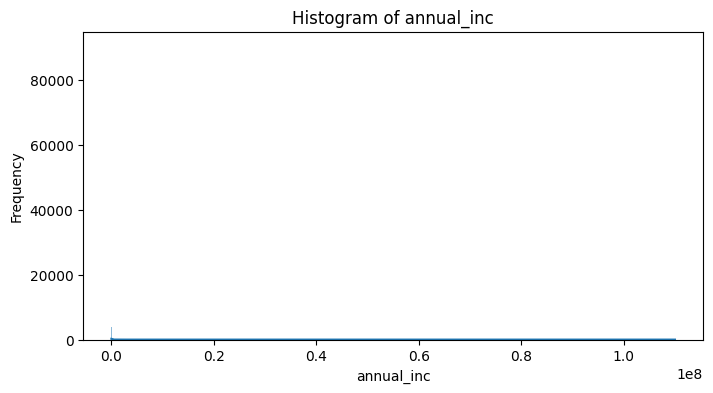

Skewness of annual_inc: 493.890


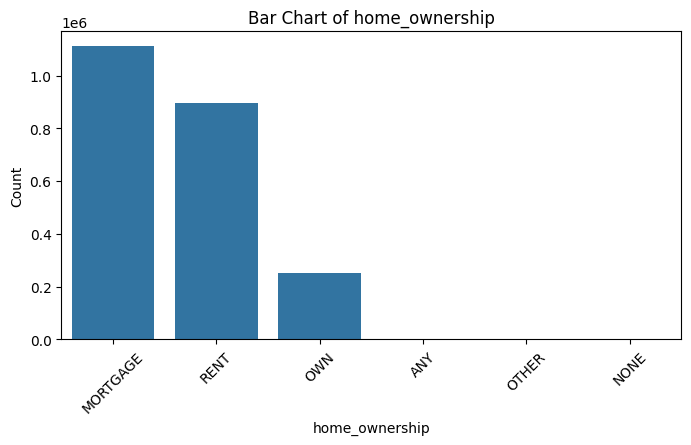

In [20]:
# ---------------------------
# 4.1 UNIVARIATE ANALYSIS
# ---------------------------

import matplotlib.pyplot as plt
import seaborn as sns

# Choose a numerical column (you can change this to any numerical feature)
num_plot_col = None
for cand in ['int_rate_num', 'annual_inc', 'loan_amnt', 'loan_amnt_num']:
    if cand in df_clean.columns and pd.api.types.is_numeric_dtype(df_clean[cand]):
        num_plot_col = cand
        break

# ----- A. Histogram for Numerical Feature -----
if num_plot_col:
    plt.figure(figsize=(8,4))
    sns.histplot(df_clean[num_plot_col].dropna(), kde=True)
    plt.title(f"Histogram of {num_plot_col}")
    plt.xlabel(num_plot_col)
    plt.ylabel("Frequency")
    plt.show()

    # Skewness
    sk = df_clean[num_plot_col].dropna().skew()
    print(f"Skewness of {num_plot_col}: {sk:.3f}")
else:
    print("No numerical column found for histogram.")



# Choose a categorical column (you can change this if needed)
cat_plot_col = None
for cand in ['home_ownership', 'grade', 'term', 'emp_length', 'purpose']:
    if cand in df_clean.columns:
        cat_plot_col = cand
        break

# ----- B. Bar Chart for Categorical Feature -----
if cat_plot_col:
    plt.figure(figsize=(8,4))
    order = df_clean[cat_plot_col].value_counts().index
    sns.countplot(data=df_clean, x=cat_plot_col, order=order)
    plt.title(f"Bar Chart of {cat_plot_col}")
    plt.xlabel(cat_plot_col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()
else:
    print("No categorical column found for bar chart.")

**Bivariate Analysis**

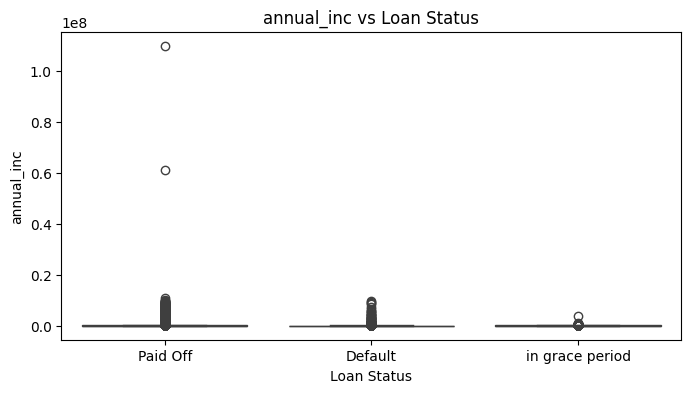

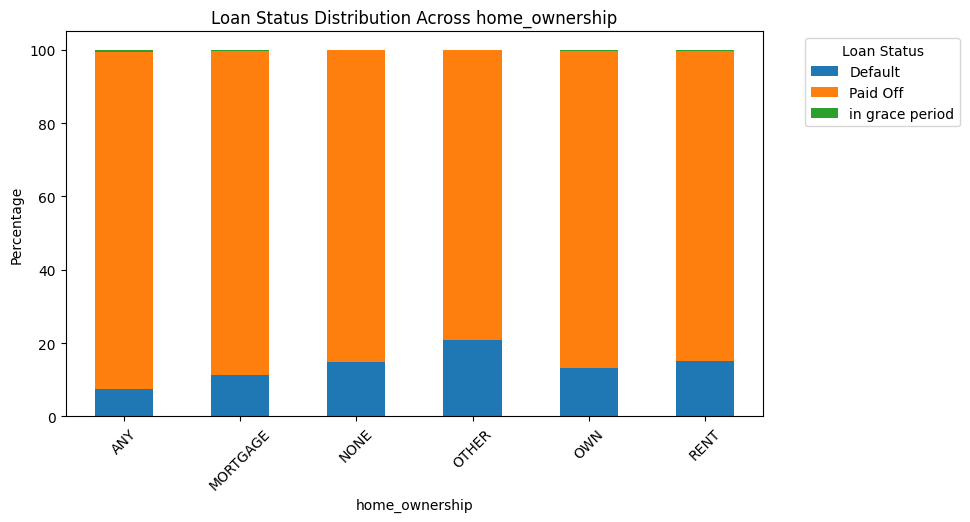

In [ ]:
# ---------------------------
# 4.2 BIVARIATE ANALYSIS
# ---------------------------

import seaborn as sns
import matplotlib.pyplot as plt

# ---------------------------
# Identify target column
# ---------------------------
target_col = None
for cand in ['loan_status', 'loan_status_clean', 'status']:
    if cand in df_clean.columns:
        target_col = cand
        break

# If needed, convert loan_status into binary Paid Off / Default
if target_col:
    def map_status(s):
        if pd.isna(s):
            return np.nan
        s = str(s).lower()
        if 'paid' in s or 'current' in s:
            return 'Paid Off'
        if 'default' in s or 'charge' in s or 'late' in s:
            return 'Default'
        return s

    df_clean['loan_target'] = df_clean[target_col].apply(map_status)



# ============================
# A. NUMERICAL vs TARGET
# ============================

num_plot_col = None
for cand in ['int_rate_num', 'annual_inc', 'loan_amnt', 'loan_amnt_num']:
    if cand in df_clean.columns and pd.api.types.is_numeric_dtype(df_clean[cand]):
        num_plot_col = cand
        break

if num_plot_col and 'loan_target' in df_clean.columns:
    plt.figure(figsize=(8,4))
    sns.boxplot(data=df_clean, x='loan_target', y=num_plot_col)
    plt.title(f"{num_plot_col} vs Loan Status")
    plt.xlabel("Loan Status")
    plt.ylabel(num_plot_col)
    plt.show()
else:
    print("No valid numerical vs target plot can be created.")



# ============================
# B. CATEGORICAL vs TARGET
# ============================

cat_plot_col = None
for cand in ['home_ownership', 'grade', 'term', 'emp_length', 'purpose']:
    if cand in df_clean.columns:
        cat_plot_col = cand
        break

if cat_plot_col and 'loan_target' in df_clean.columns:
    crosstab = pd.crosstab(df_clean[cat_plot_col], df_clean['loan_target'], normalize='index') * 100

    crosstab.plot(kind='bar', stacked=True, figsize=(9,5))
    plt.title(f"Loan Status Distribution Across {cat_plot_col}")
    plt.ylabel("Percentage")
    plt.xlabel(cat_plot_col)
    plt.legend(title='Loan Status', bbox_to_anchor=(1.05, 1))
    plt.xticks(rotation=45)
    plt.show()

else:
    print("No valid categorical vs target plot can be created.")

**Multivariate Analysis**

In [ ]:
# ---------------------------
# 4.3 MULTIVARIATE ANALYSIS
# ---------------------------

import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns
numeric_cols = df_clean.select_dtypes(include=['number']).columns.tolist()

# ---- A. Correlation Matrix ----
corr = df_clean[numeric_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()

# ---- B. Identify Top 2 Strongest Correlations ----
# (excluding self-correlation)
corr_unstacked = corr.abs().unstack()

# Remove self correlations (1.0)
corr_unstacked = corr_unstacked[corr_unstacked < 0.999]

# Sort descending
corr_sorted = corr_unstacked.sort_values(ascending=False)

# Get top 2 pairs
top2 = corr_sorted.drop_duplicates().head(2)

print("\n===== TOP 2 STRONGEST CORRELATIONS =====")
print(top2)